In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [3]:
heroinUsers = pd.read_excel('./tables/drugOffenses/heroinUsers.xlsx', 
                            usecols=[i for i in range(15)], nrows=30) # for a clean dataframe
heroinSuppliers = pd.read_excel('./tables/drugOffenses/heroinSuppliers.xlsx', 
                            usecols=[i for i in range(15)], nrows=30)
cannabisUsers = pd.read_excel('./tables/drugOffenses/cannabisUsers.xlsx', 
                            usecols=[i for i in range(15)], nrows=30) # for a clean dataframe
cannabisSuppliers = pd.read_excel('./tables/drugOffenses/cannabisSuppliers.xlsx', 
                            usecols=[i for i in range(15)], nrows=30)
cocaineUsers = pd.read_excel('./tables/drugOffenses/cocaineUsers.xlsx', 
                            usecols=[i for i in range(15)], nrows=30) # for a clean dataframe
cocaineSuppliers = pd.read_excel('./tables/drugOffenses/cocaineSuppliers.xlsx', 
                            usecols=[i for i in range(15)], nrows=30)
ecstasyUsers = pd.read_excel('./tables/drugOffenses/ecstasyUsers.xlsx', 
                            usecols=[i for i in range(15)], nrows=30) # for a clean dataframe
ecstasySuppliers = pd.read_excel('./tables/drugOffenses/ecstasySuppliers.xlsx', 
                            usecols=[i for i in range(15)], nrows=30)

In [4]:
def get_mae_r2(suppliers, users):
    data = dict()
    i = 0
    for target_country in users['Country']:
        # making the dataframe for target_country
        df = suppliers[suppliers['Country'] == target_country].T[1:]
        df.columns = ["Suppliers " + target_country]

        for country in list(suppliers['Country']):
            if country != target_country:
                joiner = suppliers[suppliers['Country'] == country].T[1:]
                joiner.columns = ["Suppliers " + country]
                df = df.join(joiner)

        # users in target country
        joiner = users[users['Country'] == target_country].T[1:]

        if not joiner[i].isnull().sum() >= len(joiner/2):
            i+= 1
            joiner = joiner.fillna(joiner.mean())

            joiner.columns = ["Users " + target_country]
            df = df.join(joiner)

            # handeling NAN values
            for country in df.columns:
                if df[country].isnull().sum() >= len(df[country]/2):
                    df = df.drop(country, axis = 1) # if more than half are nan
                else:
                    df[country] = df[country].fillna(df[country].mean())

            X = df.loc[:, df.columns != "Users " + target_country].values
            y = df["Users " + target_country].values

            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 

            # Danilo, samo smeni tuka koj regressor sakas. Dr mislam deka e vo red
            regressor = LinearRegression()
            #regressor = Lasso(tol=0.001) # za da ne ima errors
            #regressor = Ridge()
            #regressor = RandomForestRegressor()
            
            regressor.fit(X_train, y_train)

            y_pred = regressor.predict(X_test)

            mae=metrics.mean_absolute_error(y_test, y_pred)
            r2=r2_score(y_test, y_pred)

            data[target_country] = (mae, r2)
        else:
            i+=1
    return data

In [7]:
heroin = get_mae_r2(heroinSuppliers, heroinUsers)
cocaine = get_mae_r2(cocaineSuppliers, cocaineUsers)
cannabis = get_mae_r2(cannabisSuppliers, cannabisUsers)
ecstasy = get_mae_r2(ecstasySuppliers, ecstasyUsers)

In [8]:
ecstasy

{'Austria': (227.97185189037708, 0.4646536864621207),
 'Belgium': (156.41831276963651, 0.21553242028661934),
 'Croatia': (194.20215838829552, -0.05313722759493955),
 'Cyprus': (4.028640397502106, 0.562843275562787),
 'Czechia': (24.515133705811373, -0.8762986652618647),
 'France': (83.74422088614222, 0.5485761779707933),
 'Germany': (504.716389486905, 0.8114679525731456),
 'Greece': (31.284713678732807, -3.2851150209913342),
 'Hungary': (44.578955879012405, -4.590666396952479),
 'Italy': (50.77169893804821, 0.17012999521053074),
 'Latvia': (17.3832557217226, -13.229601503730027),
 'Lithuania': (10.663659563247865, 0.5430492302461858),
 'Luxembourg': (3.0260327995431213, -0.6559758716788924),
 'Malta': (16.547199103672032, -4.213709340966264),
 'Poland': (192.67398453829472, 0.7011029101476203),
 'Portugal': (43.8213900654347, -0.5794139935886558),
 'Slovakia': (1.0678077942606157, -8.168852044180747),
 'Slovenia': (9.239745532667758, -0.45237779025691527),
 'Spain': (155.29908667972254

### Multiple linear regression on heroin, cannabis, cocaine users based on its suppliers. (getting mean absolute error and explained variance)

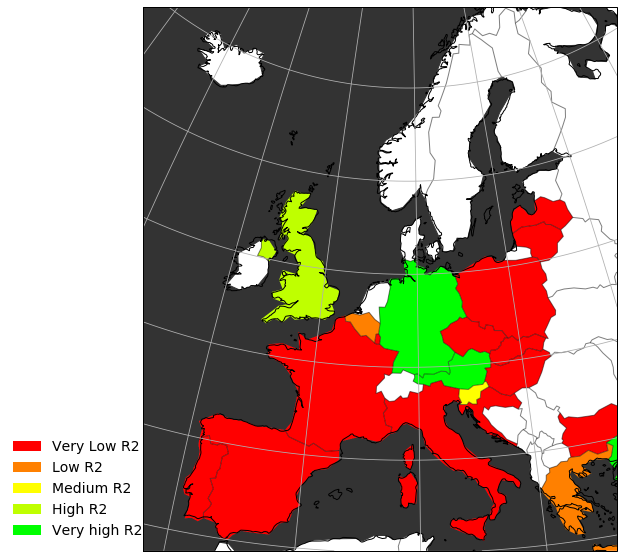

In [21]:
import cartopy
import cartopy.crs as ccrs
import matplotlib.patches as mpatches
import cartopy.io.shapereader as shpreader

def getColor(zVal):
    bot10 = 0.2
    top10 = 0.8
    bot30 = 0.4
    top30 = 0.6

    if zVal > bot10 and zVal < top10:
        if zVal > bot30 and zVal < top30:
            return (1,1,0) ##yellow
        if zVal> bot30:
            return (0.75,1,0) ##lime
        return (1,0.5,0) ##orange
    if zVal> bot10:
        return (0,1,0) ##red
    return (1,0,0) ##green
    
    
plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.EuroPP())

shpfilename = shpreader.natural_earth(resolution='110m',
                                      category='cultural',
                                      name='admin_0_countries')
reader = shpreader.Reader(shpfilename)
countries = reader.records()
for country in countries:
    if country.attributes["NAME"] in heroin:
        ax.add_geometries([country.geometry], crs=ccrs.PlateCarree(), facecolor=getColor(heroin[country.attributes["NAME"]][1]))

ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=.5)
ax.coastlines(resolution='50m')
ax.add_feature(cartopy.feature.OCEAN,facecolor=(0.2,0.2,0.2))
ax.gridlines()
values = ["Very Low R2", "Low R2", "Medium R2","High R2" ,"Very high R2" ]
rects = []

colors = [(1,0,0), (1,0.5,0), (1,1,0), (0.75,1,0), (0,1,0)]
for i in range(len(values)):
    rects.append(mpatches.Rectangle((0, 0), 1, 1, facecolor=colors[i]))
    
ax.legend(rects, values,loc='lower right', bbox_to_anchor=(0.025, -0.0), fancybox=True, frameon=False, fontsize=14)  

leg = ax.get_legend()


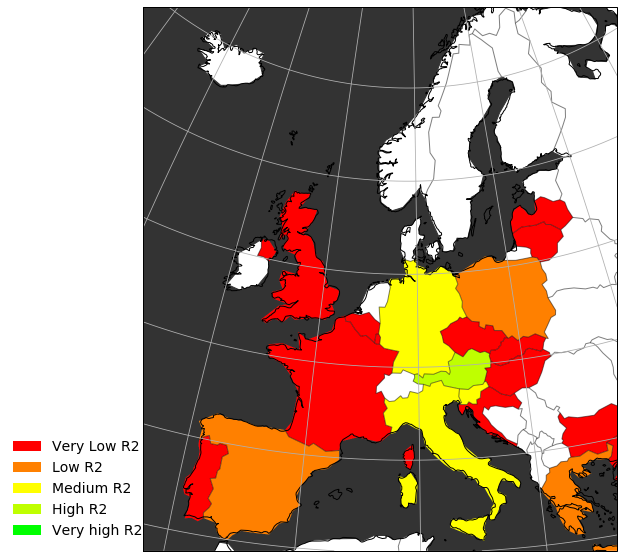

In [22]:
import cartopy
import cartopy.crs as ccrs
import matplotlib.patches as mpatches
import cartopy.io.shapereader as shpreader

def getColor(zVal):
    bot10 = 0.2
    top10 = 0.8
    bot30 = 0.4
    top30 = 0.6

    if zVal > bot10 and zVal < top10:
        if zVal > bot30 and zVal < top30:
            return (1,1,0) ##yellow
        if zVal> bot30:
            return (0.75,1,0) ##lime
        return (1,0.5,0) ##orange
    if zVal> bot10:
        return (0,1,0) ##red
    return (1,0,0) ##green
    
    
plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.EuroPP())

shpfilename = shpreader.natural_earth(resolution='110m',
                                      category='cultural',
                                      name='admin_0_countries')
reader = shpreader.Reader(shpfilename)
countries = reader.records()
for country in countries:
    if country.attributes["NAME"] in cocaine:
        ax.add_geometries([country.geometry], crs=ccrs.PlateCarree(), facecolor=getColor(cocaine[country.attributes["NAME"]][1]))

ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=.5)
ax.coastlines(resolution='50m')
ax.add_feature(cartopy.feature.OCEAN,facecolor=(0.2,0.2,0.2))
ax.gridlines()
values = ["Very Low R2", "Low R2", "Medium R2","High R2" ,"Very high R2" ]
rects = []

colors = [(1,0,0), (1,0.5,0), (1,1,0), (0.75,1,0), (0,1,0)]
for i in range(len(values)):
    rects.append(mpatches.Rectangle((0, 0), 1, 1, facecolor=colors[i]))
    
ax.legend(rects, values,loc='lower right', bbox_to_anchor=(0.025, -0.0), fancybox=True, frameon=False, fontsize=14)  

leg = ax.get_legend()


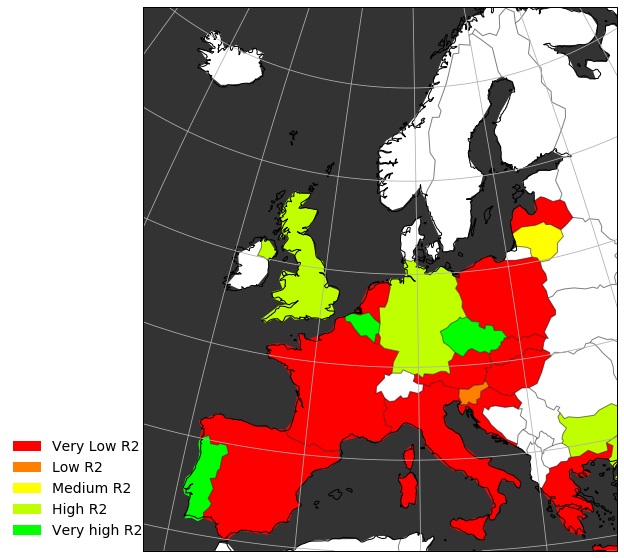

In [23]:
import cartopy
import cartopy.crs as ccrs
import matplotlib.patches as mpatches
import cartopy.io.shapereader as shpreader

def getColor(zVal):
    bot10 = 0.2
    top10 = 0.8
    bot30 = 0.4
    top30 = 0.6

    if zVal > bot10 and zVal < top10:
        if zVal > bot30 and zVal < top30:
            return (1,1,0) ##yellow
        if zVal> bot30:
            return (0.75,1,0) ##lime
        return (1,0.5,0) ##orange
    if zVal> bot10:
        return (0,1,0) ##red
    return (1,0,0) ##green
    
    
plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.EuroPP())

shpfilename = shpreader.natural_earth(resolution='110m',
                                      category='cultural',
                                      name='admin_0_countries')
reader = shpreader.Reader(shpfilename)
countries = reader.records()
for country in countries:
    if country.attributes["NAME"] in cannabis:
        ax.add_geometries([country.geometry], crs=ccrs.PlateCarree(), facecolor=getColor(cannabis[country.attributes["NAME"]][1]))

ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=.5)
ax.coastlines(resolution='50m')
ax.add_feature(cartopy.feature.OCEAN,facecolor=(0.2,0.2,0.2))
ax.gridlines()
values = ["Very Low R2", "Low R2", "Medium R2","High R2" ,"Very high R2" ]
rects = []

colors = [(1,0,0), (1,0.5,0), (1,1,0), (0.75,1,0), (0,1,0)]
for i in range(len(values)):
    rects.append(mpatches.Rectangle((0, 0), 1, 1, facecolor=colors[i]))
    
ax.legend(rects, values,loc='lower right', bbox_to_anchor=(0.025, -0.0), fancybox=True, frameon=False, fontsize=14)  

leg = ax.get_legend()


## Dataframe

In [8]:
def get_df_reg(suppliers, users):
    regressions = pd.DataFrame()
    i = 0
    for target_country in users['Country']:
        # making the dataframe for target_country
        df = suppliers[suppliers['Country'] == target_country].T[1:]
        df.columns = ["Suppliers " + target_country]

        for country in list(suppliers['Country']):
            if country != target_country:
                joiner = suppliers[suppliers['Country'] == country].T[1:]
                joiner.columns = ["Suppliers " + country]
                df = df.join(joiner)

        # users in target country
        joiner = users[users['Country'] == target_country].T[1:]

        if not joiner[i].isnull().sum() >= len(joiner/2):
            i+= 1
            joiner = joiner.fillna(joiner.mean())

            joiner.columns = ["Users " + target_country]
            df = df.join(joiner)

            # handeling NAN values
            for country in df.columns:
                if df[country].isnull().sum() >= len(df[country]/2):
                    df = df.drop(country, axis = 1) # if more than half are nan
                else:
                    df[country] = df[country].fillna(df[country].mean())

            X = df.loc[:, df.columns != "Users " + target_country].values
            y = df["Users " + target_country].values

            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 

            Linear = LinearRegression()
            LassoLearn = Lasso(tol=0.001) # za da ne ima errors
            RidgeLearn = Ridge()
            RandomForest = RandomForestRegressor()
            learners = [Linear, LassoLearn, RidgeLearn, RandomForest]
            for reg in learners:
                reg.fit(X_train, y_train)
                y_pred = reg.predict(X_test)

                mae=metrics.mean_absolute_error(y_test, y_pred)
                r2=r2_score(y_test, y_pred)

                regressions = regressions.append({"Country": target_country, "Regression": str(reg),
                                                 "MAE": mae, "R2": r2}, ignore_index=True)
        else:
            i+=1
    return regressions

In [9]:
heroinReg = get_df_reg(heroinSuppliers, heroinUsers)
cocaineReg = get_df_reg(cocaineSuppliers, cocaineUsers)
cannabisReg = get_df_reg(cannabisSuppliers, cannabisUsers)

C:\Users\DANIEL\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\DANIEL\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\DANIEL\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\DANIEL\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\DANIEL\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\DANIEL\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\DANIEL\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\DANIEL\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\DANIEL\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\DANIEL\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

In [10]:
heroinReg

,Country,MAE,R2,Regression
0,Austria,196.325939,0.893527,"LinearRegression(copy_X=True, fit_intercept=Tr..."
1,Austria,439.137565,0.543229,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr..."
2,Austria,196.315236,0.893530,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr..."
3,Austria,301.423077,0.749548,"RandomForestRegressor(bootstrap=True, criterio..."
4,Belgium,228.237320,0.223190,"LinearRegression(copy_X=True, fit_intercept=Tr..."
...,...,...,...,...
83,Turkey,1071.011429,0.455260,"RandomForestRegressor(bootstrap=True, criterio..."
84,United Kingdom,798.904916,0.668104,"LinearRegression(copy_X=True, fit_intercept=Tr..."
85,United Kingdom,1164.786094,0.095620,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr..."
86,United Kingdom,798.892912,0.668126,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr..."


In [11]:
cocaineReg

,Country,MAE,R2,Regression
0,Austria,220.090712,0.678149,"LinearRegression(copy_X=True, fit_intercept=Tr..."
1,Austria,556.436440,-0.352239,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr..."
2,Austria,220.079830,0.678179,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr..."
3,Austria,291.213846,0.313162,"RandomForestRegressor(bootstrap=True, criterio..."
4,Belgium,233.959130,-1.683014,"LinearRegression(copy_X=True, fit_intercept=Tr..."
...,...,...,...,...
83,Turkey,243.865714,-0.589698,"RandomForestRegressor(bootstrap=True, criterio..."
84,United Kingdom,2291.651575,-0.181059,"LinearRegression(copy_X=True, fit_intercept=Tr..."
85,United Kingdom,2728.788554,-0.960841,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr..."
86,United Kingdom,2291.515935,-0.180913,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr..."


In [12]:
cannabisReg

,Country,MAE,R2,Regression
0,Austria,3896.805957,-3.129587,"LinearRegression(copy_X=True, fit_intercept=Tr..."
1,Austria,2937.569068,-2.270667,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr..."
2,Austria,3896.796757,-3.129569,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr..."
3,Austria,1727.038462,0.135365,"RandomForestRegressor(bootstrap=True, criterio..."
4,Belgium,938.936947,0.933044,"LinearRegression(copy_X=True, fit_intercept=Tr..."
...,...,...,...,...
87,Turkey,7137.500000,0.043993,"RandomForestRegressor(bootstrap=True, criterio..."
88,United Kingdom,3169.431707,0.667023,"LinearRegression(copy_X=True, fit_intercept=Tr..."
89,United Kingdom,4079.439339,0.479060,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr..."
90,United Kingdom,3169.430413,0.667022,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr..."


## simple regression on Austria based on years and suppliers in Austria
## this is cringe, dont mind this (i may return to this)

In [13]:
target_country = 'Austria'
df_simple = heroinSuppliers[heroinSuppliers['Country'] == target_country].T[1:]
df_simple.columns = ["Suppliers " + target_country]

joiner = heroinUsers[heroinUsers['Country'] == target_country].T[1:]
joiner.columns = ["Users " + target_country]
df_simple = df_simple.join(joiner)
df_simple = df_simple.drop(2004)
df_simple['Years'] = [i for i in range(2005, 2018)][::-1]

In [14]:
reg_simple = linear_model.LinearRegression()
reg_simple.fit(df_simple[['Years','Suppliers Austria']], df_simple["Users Austria"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
user_list=[]

suppliers = df_simple['Suppliers Austria'].mean()
for year in range(2018, 2025):
    users = reg_simple.predict([[year, suppliers]])[0]
    print("In the year " + str(year) + " the model has predicted " + 
          str(users) + " users in Austria on " + str(suppliers) + " suppliers")
    
    user_list.append(users)    #on mean suppliers
print("====================")
suppliers = 700
for year in range(2018, 2025):
    users = reg_simple.predict([[year, suppliers]])[0]
    print("In the year " + str(year) + " the model has predicted " + 
          str(users) + " users in Austria on " + str(suppliers) + " suppliers")

In the year 2018 the model has predicted 1020.3006127455155 users in Austria on 586.5384615384615 suppliers
In the year 2019 the model has predicted 880.9919090718031 users in Austria on 586.5384615384615 suppliers
In the year 2020 the model has predicted 741.6832053980906 users in Austria on 586.5384615384615 suppliers
In the year 2021 the model has predicted 602.3745017243782 users in Austria on 586.5384615384615 suppliers
In the year 2022 the model has predicted 463.06579805066576 users in Austria on 586.5384615384615 suppliers
In the year 2023 the model has predicted 323.7570943769533 users in Austria on 586.5384615384615 suppliers
In the year 2024 the model has predicted 184.44839070324088 users in Austria on 586.5384615384615 suppliers
In the year 2018 the model has predicted 1379.8000689211185 users in Austria on 700 suppliers
In the year 2019 the model has predicted 1240.491365247406 users in Austria on 700 suppliers
In the year 2020 the model has predicted 1101.1826615736936 u